In [1]:
%matplotlib notebook
import datetime as dt  # Python standard library datetime  module
import numpy as np
import netCDF4  # http://code.google.com/p/netcdf4-python/
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, addcyclic, shiftgrid

import s2_py as s2
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, mapping

import os
import pickle
import wget
import subprocess


import matplotlib.animation as animation

import google.cloud.bigquery
import pandas_gbq
import pandas as pd
import shapefile as shp
import descartes
from shapely.geometry import Polygon, mapping, Point
from sklearn.metrics.pairwise import euclidean_distances

import itertools

In [2]:
fapar2016 = pd.read_csv('/home/scott/sat_aggs/dated/fapar2016.csv')
fapar2016_v2 = pd.read_csv('/home/scott/sat_aggs/dated/fapar2016_v2.csv')

/home/scott/anaconda3/envs/sat/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/scott/anaconda3/envs/sat/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
fapar2016.columns.difference(fapar2016_v2.columns)

Index(['faparMask_myMean', 'faparMask_myMedian', 'faparMask_myStd',
       'lat_myMean', 'lat_myMedian', 'lat_myStd', 'lon_myMean', 'lon_myMedian',
       'lon_myStd'],
      dtype='object')

In [4]:
fapar2016_v2.columns.difference(fapar2016.columns)

Index(['faparMask_mean', 'faparMask_median', 'faparMask_std', 'lat_mean',
       'lat_median', 'lat_std', 'lon_mean', 'lon_median', 'lon_std'],
      dtype='object')

In [5]:
fapar2016.head()

,Unnamed: 0,mergeKey,lat_min,lat_max,lat_myMean,lat_myMedian,lat_myStd,lat_size,lat_count,lat_nunique,...,faparVal_nunique,faparMask_min,faparMask_max,faparMask_myMean,faparMask_myMedian,faparMask_myStd,faparMask_size,faparMask_count,faparMask_nunique,date
0,0,54c934,41.958333,42.053571,42.018738,42.020833,0.022954,2023,2023,33,...,540,False,True,0.575877,True,0.494209,2023,2023,2,2016-01-10
1,1,54c9354,41.958333,41.997024,41.978733,41.979167,0.009014,206,206,14,...,115,False,True,0.184466,False,0.387864,206,206,2,2016-01-10
2,2,54c935c,41.973214,42.011905,41.993210,41.994048,0.009043,206,206,14,...,106,False,True,0.242718,False,0.428726,206,206,2,2016-01-10
3,3,54c9364,41.988095,42.026786,42.007709,42.008929,0.009088,205,205,14,...,85,False,True,0.375610,False,0.484280,205,205,2,2016-01-10
4,4,54c9414,41.988095,42.029762,42.008885,42.008929,0.009117,206,206,15,...,24,False,True,0.820388,True,0.383864,206,206,2,2016-01-10


In [6]:
fapar2016_v2.head()

,Unnamed: 0,mergeKey,lat_min,lat_max,lat_mean,lat_median,lat_std,lat_size,lat_count,lat_nunique,...,faparMask_nunique,faparVal_size,faparVal_count,faparVal_nunique,faparVal_myMean,faparVal_myMedian,faparVal_myStd,faparVal_min,faparVal_max,date
0,0,54c934,41.958333,42.053571,42.018738,42.020833,0.022960,2023,2023,33,...,2,2023,2023,540,0.2472028084368486,0.23600002,0.07386056904311214,0.040000003,0.61600006,2016-01-10
1,1,54c9354,41.958333,41.997024,41.978733,41.979167,0.009036,206,206,14,...,2,206,206,115,0.22059524815440887,0.20400001,0.07666953653002337,0.040000003,0.61600006,2016-01-10
2,2,54c935c,41.973214,42.011905,41.993210,41.994048,0.009065,206,206,14,...,2,206,206,106,0.24735898500642714,0.23400001,0.06987974842246329,0.120000005,0.42000002,2016-01-10
3,3,54c9364,41.988095,42.026786,42.007709,42.008929,0.009110,205,205,14,...,2,205,205,85,0.2623437612783164,0.24000001,0.08853887547404075,0.104,0.51600003,2016-01-10
4,4,54c9414,41.988095,42.029762,42.008885,42.008929,0.009139,206,206,15,...,2,206,206,24,0.264216227305902,0.26000002,0.02891846516952588,0.19600001,0.33200002,2016-01-10


In [7]:
fapar2016.describe()

,Unnamed: 0,lat_min,lat_max,lat_myMean,lat_myMedian,lat_myStd,lat_size,lat_count,lat_nunique,lon_min,...,faparVal_myMedian,faparVal_myStd,faparVal_size,faparVal_count,faparVal_nunique,faparMask_myMean,faparMask_myStd,faparMask_size,faparMask_count,faparMask_nunique
count,383148.000000,383148.000000,383148.000000,383148.000000,383148.000000,383148.000000,383148.000000,383148.000000,383148.000000,383148.000000,...,382816.000000,383148.000000,383148.000000,383148.000000,383148.000000,383148.000000,383148.00000,383148.000000,383148.000000,383148.000000
mean,5321.000000,37.852794,37.923626,37.888207,37.888210,0.016917,582.104670,582.104670,24.799493,-120.569811,...,0.386228,0.072216,582.104670,582.104670,97.771963,0.029013,0.03670,582.104670,582.104670,1.187458
std,3072.373453,2.489396,2.477312,2.483286,2.483293,0.009390,745.989655,745.989655,13.460306,1.925035,...,0.212384,0.052870,745.989655,745.989655,77.811953,0.128125,0.10202,745.989655,745.989655,0.390279
min,0.000000,32.461310,32.589286,32.537814,32.538690,0.008403,182.000000,182.000000,13.000000,-124.523810,...,0.000000,0.000000,182.000000,182.000000,1.000000,0.000000,0.00000,182.000000,182.000000,1.000000
25%,2660.000000,35.824405,35.898810,35.861607,35.861607,0.011595,200.000000,200.000000,17.000000,-122.035714,...,0.216000,0.034151,200.000000,200.000000,61.000000,0.000000,0.00000,200.000000,200.000000,1.000000
50%,5321.000000,37.889881,37.964286,37.926028,37.925595,0.012083,212.000000,212.000000,17.000000,-120.619048,...,0.396000,0.071591,212.000000,212.000000,82.000000,0.000000,0.00000,212.000000,212.000000,1.000000
75%,7982.000000,39.976190,40.047619,40.011182,40.011905,0.023291,792.000000,792.000000,34.000000,-119.324405,...,0.544000,0.104270,792.000000,792.000000,111.000000,0.000000,0.00000,792.000000,792.000000,1.000000
max,10642.000000,42.005952,42.053571,42.037843,42.038690,0.050263,3647.000000,3647.000000,71.000000,-114.142857,...,0.936000,0.343658,3647.000000,3647.000000,1764.000000,1.000000,0.50000,3647.000000,3647.000000,2.000000


In [8]:
fapar2016_v2.describe()

,Unnamed: 0,lat_min,lat_max,lat_mean,lat_median,lat_std,lat_size,lat_count,lat_nunique,lon_min,...,lon_count,lon_nunique,faparMask_mean,faparMask_std,faparMask_size,faparMask_count,faparMask_nunique,faparVal_size,faparVal_count,faparVal_nunique
count,383148.000000,383148.000000,383148.000000,383148.000000,383148.000000,383148.000000,383148.000000,383148.000000,383148.000000,383148.000000,...,383148.000000,383148.000000,383148.000000,383148.000000,383148.000000,383148.000000,383148.000000,383148.000000,383148.000000,383148.000000
mean,5321.000000,37.852794,37.923626,37.888207,37.888210,0.016939,582.104670,582.104670,24.799493,-120.569811,...,582.104670,26.635629,0.029013,0.036756,582.104670,582.104670,1.187458,582.104670,582.104670,97.771963
std,3072.373453,2.489396,2.477312,2.483286,2.483293,0.009384,745.989655,745.989655,13.460306,1.925035,...,745.989655,14.366273,0.128125,0.102179,745.989655,745.989655,0.390279,745.989655,745.989655,77.811953
min,0.000000,32.461310,32.589286,32.537814,32.538690,0.008426,182.000000,182.000000,13.000000,-124.523810,...,182.000000,15.000000,0.000000,0.000000,182.000000,182.000000,1.000000,182.000000,182.000000,1.000000
25%,2660.000000,35.824405,35.898810,35.861607,35.861607,0.011625,200.000000,200.000000,17.000000,-122.035714,...,200.000000,16.000000,0.000000,0.000000,200.000000,200.000000,1.000000,200.000000,200.000000,61.000000
50%,5321.000000,37.889881,37.964286,37.926028,37.925595,0.012111,212.000000,212.000000,17.000000,-120.619048,...,212.000000,26.000000,0.000000,0.000000,212.000000,212.000000,1.000000,212.000000,212.000000,82.000000
75%,7982.000000,39.976190,40.047619,40.011182,40.011905,0.023306,792.000000,792.000000,34.000000,-119.324405,...,792.000000,31.000000,0.000000,0.000000,792.000000,792.000000,1.000000,792.000000,792.000000,111.000000
max,10642.000000,42.005952,42.053571,42.037843,42.038690,0.050270,3647.000000,3647.000000,71.000000,-114.142857,...,3647.000000,112.000000,1.000000,0.501294,3647.000000,3647.000000,2.000000,3647.000000,3647.000000,1764.000000


#### I think the 2016 v1 set had all the values wrong, but the 2016 v2 set has them right.  Check by looking at count of nan, null, 0.

In [9]:
fapar2016.columns

Index(['Unnamed: 0', 'mergeKey', 'lat_min', 'lat_max', 'lat_myMean',
       'lat_myMedian', 'lat_myStd', 'lat_size', 'lat_count', 'lat_nunique',
       'lon_min', 'lon_max', 'lon_myMean', 'lon_myMedian', 'lon_myStd',
       'lon_size', 'lon_count', 'lon_nunique', 'faparVal_min', 'faparVal_max',
       'faparVal_myMean', 'faparVal_myMedian', 'faparVal_myStd',
       'faparVal_size', 'faparVal_count', 'faparVal_nunique', 'faparMask_min',
       'faparMask_max', 'faparMask_myMean', 'faparMask_myMedian',
       'faparMask_myStd', 'faparMask_size', 'faparMask_count',
       'faparMask_nunique', 'date'],
      dtype='object')

In [10]:
fapar2016_v2.columns

Index(['Unnamed: 0', 'mergeKey', 'lat_min', 'lat_max', 'lat_mean',
       'lat_median', 'lat_std', 'lat_size', 'lat_count', 'lat_nunique',
       'lon_min', 'lon_max', 'lon_mean', 'lon_median', 'lon_std', 'lon_size',
       'lon_count', 'lon_nunique', 'faparMask_min', 'faparMask_max',
       'faparMask_mean', 'faparMask_median', 'faparMask_std', 'faparMask_size',
       'faparMask_count', 'faparMask_nunique', 'faparVal_size',
       'faparVal_count', 'faparVal_nunique', 'faparVal_myMean',
       'faparVal_myMedian', 'faparVal_myStd', 'faparVal_min', 'faparVal_max',
       'date'],
      dtype='object')

In [11]:
fapar2016[['mergeKey', 'faparVal_min', 'faparVal_max',
       'faparVal_myMean', 'faparVal_myMedian', 'faparVal_myStd',
       'faparVal_size', 'faparVal_count', 'faparVal_nunique', 'faparMask_min',
       'faparMask_max', 'faparMask_myMean', 'faparMask_myMedian',
       'faparMask_myStd', 'faparMask_size', 'faparMask_count',
       'faparMask_nunique', 'date']].describe()

,faparVal_min,faparVal_max,faparVal_myMean,faparVal_myMedian,faparVal_myStd,faparVal_size,faparVal_count,faparVal_nunique,faparMask_myMean,faparMask_myStd,faparMask_size,faparMask_count,faparMask_nunique
count,383148.000000,383148.000000,383148.000000,382816.000000,383148.000000,383148.000000,383148.000000,383148.000000,383148.000000,383148.00000,383148.000000,383148.000000,383148.000000
mean,0.173566,0.593759,0.327752,0.386228,0.072216,582.104670,582.104670,97.771963,0.029013,0.03670,582.104670,582.104670,1.187458
std,0.157714,0.247195,0.241742,0.212384,0.052870,745.989655,745.989655,77.811953,0.128125,0.10202,745.989655,745.989655,0.390279
min,0.000000,0.000000,0.000000,0.000000,0.000000,182.000000,182.000000,1.000000,0.000000,0.00000,182.000000,182.000000,1.000000
25%,0.040000,0.452000,0.091620,0.216000,0.034151,200.000000,200.000000,61.000000,0.000000,0.00000,200.000000,200.000000,1.000000
50%,0.124000,0.644000,0.338769,0.396000,0.071591,212.000000,212.000000,82.000000,0.000000,0.00000,212.000000,212.000000,1.000000
75%,0.284000,0.788000,0.526051,0.544000,0.104270,792.000000,792.000000,111.000000,0.000000,0.00000,792.000000,792.000000,1.000000
max,0.940000,0.940000,0.915236,0.936000,0.343658,3647.000000,3647.000000,1764.000000,1.000000,0.50000,3647.000000,3647.000000,2.000000


In [12]:
fapar2016_v2[['mergeKey', 'faparVal_min', 'faparVal_max',
       'faparVal_myMean', 'faparVal_myMedian', 'faparVal_myStd',
       'faparVal_size', 'faparVal_count', 'faparVal_nunique', 'faparMask_min',
       'faparMask_max', 'faparMask_mean', 'faparMask_median',
       'faparMask_std', 'faparMask_size', 'faparMask_count',
       'faparMask_nunique', 'date']].describe()

,faparVal_size,faparVal_count,faparVal_nunique,faparMask_mean,faparMask_std,faparMask_size,faparMask_count,faparMask_nunique
count,383148.000000,383148.000000,383148.000000,383148.000000,383148.000000,383148.000000,383148.000000,383148.000000
mean,582.104670,582.104670,97.771963,0.029013,0.036756,582.104670,582.104670,1.187458
std,745.989655,745.989655,77.811953,0.128125,0.102179,745.989655,745.989655,0.390279
min,182.000000,182.000000,1.000000,0.000000,0.000000,182.000000,182.000000,1.000000
25%,200.000000,200.000000,61.000000,0.000000,0.000000,200.000000,200.000000,1.000000
50%,212.000000,212.000000,82.000000,0.000000,0.000000,212.000000,212.000000,1.000000
75%,792.000000,792.000000,111.000000,0.000000,0.000000,792.000000,792.000000,1.000000
max,3647.000000,3647.000000,1764.000000,1.000000,0.501294,3647.000000,3647.000000,2.000000


In [13]:
fapar2016[['faparVal_min','faparVal_max']].isna().sum()

faparVal_min    0
faparVal_max    0
dtype: int64

In [14]:
fapar2016_v2[['faparVal_min','faparVal_max']].isna().sum()

faparVal_min    0
faparVal_max    0
dtype: int64

In [15]:
(fapar2016[['faparVal_min','faparVal_max']]==0).sum()

faparVal_min    32452
faparVal_max    13248
dtype: int64

In [16]:
(fapar2016_v2[['faparVal_min','faparVal_max']]==0).sum()

faparVal_min    0
faparVal_max    0
dtype: int64

In [17]:
# There are no longer any 0-valued positions for the FaparVal_max

fapar2016_v2[fapar2016_v2['faparVal_max']==0][['mergeKey', 'faparMask_min', 'faparMask_max', 'faparMask_mean', 
                            'faparMask_median', 'faparMask_std', 'faparMask_size',
       'faparMask_count', 'faparMask_nunique', 'faparVal_min', 'faparVal_max',
       'faparVal_size', 'faparVal_count', 'faparVal_nunique',
       'faparVal_myMean', 'faparVal_myMedian', 'faparVal_myStd', 'date']]

,mergeKey,faparMask_min,faparMask_max,faparMask_mean,faparMask_median,faparMask_std,faparMask_size,faparMask_count,faparMask_nunique,faparVal_min,faparVal_max,faparVal_size,faparVal_count,faparVal_nunique,faparVal_myMean,faparVal_myMedian,faparVal_myStd,date


In [20]:
(fapar2016_v2['faparMask_mean']==1).sum()
#there are only 332 records fully masked

332

In [21]:
# What about the original data set?
# Here the median says one thing, the mean something else, min and max something else.
# They are also instance of partial masking, in fact they look to be the same cells as the other data set?

fapar2016[fapar2016['faparVal_max']==0][['mergeKey', 'faparMask_min', 'faparMask_max', 'faparMask_myMean', 
                            'faparMask_myMedian', 'faparMask_myStd', 'faparMask_size',
       'faparMask_count', 'faparMask_nunique', 'faparVal_min', 'faparVal_max',
       'faparVal_size', 'faparVal_count', 'faparVal_nunique',
       'faparVal_myMean', 'faparVal_myMedian', 'faparVal_myStd', 'date']]

,mergeKey,faparMask_min,faparMask_max,faparMask_myMean,faparMask_myMedian,faparMask_myStd,faparMask_size,faparMask_count,faparMask_nunique,faparVal_min,faparVal_max,faparVal_size,faparVal_count,faparVal_nunique,faparVal_myMean,faparVal_myMedian,faparVal_myStd,date
2,54c935c,False,True,0.242718,False,0.428726,206,206,2,0.0,0.0,206,206,106,0.0,0.234,0.0,2016-01-10
4,54c9414,False,True,0.820388,True,0.383864,206,206,2,0.0,0.0,206,206,24,0.0,0.260,0.0,2016-01-10
5,54c9424,False,True,0.975610,True,0.154257,205,205,2,0.0,0.0,205,205,2,0.0,0.332,0.0,2016-01-10
6,54c942c,True,True,1.000000,True,0.000000,205,205,1,0.0,0.0,205,205,1,0.0,NaN,0.0,2016-01-10
7,54c9434,False,True,0.995098,True,0.069842,204,204,2,0.0,0.0,204,204,1,0.0,0.304,0.0,2016-01-10
8,54c943c,True,True,1.000000,True,0.000000,204,204,1,0.0,0.0,204,204,1,0.0,NaN,0.0,2016-01-10
9,54c9444,False,True,0.588235,True,0.492153,204,204,2,0.0,0.0,204,204,59,0.0,0.312,0.0,2016-01-10
10,54c944c,False,True,0.980583,True,0.137987,206,206,2,0.0,0.0,206,206,2,0.0,0.238,0.0,2016-01-10
11,54c9454,False,True,0.966019,True,0.181179,206,206,2,0.0,0.0,206,206,4,0.0,0.264,0.0,2016-01-10
12,54c945c,False,True,0.660099,True,0.473675,203,203,2,0.0,0.0,203,203,47,0.0,0.232,0.0,2016-01-10


In [22]:
(fapar2016['faparVal_max']==0).sum()

13248

In [23]:
(fapar2016_v2['faparVal_max']==0).sum()

#That's better

0

In [24]:
ca_s2_df = gpd.read_file("/home/scott/w210_Wildfire/DataPrep/Data/Processed/CA_S2Cells/CA_S2Cells.shp")

In [25]:
ca_s2_df['mergeKey'] = ca_s2_df['S2_Cells_I']
dfv2 = ca_s2_df.merge(fapar2016_v2, on = 'mergeKey')

In [26]:
len(dfv2)

383148

<IPython.core.display.Javascript object>


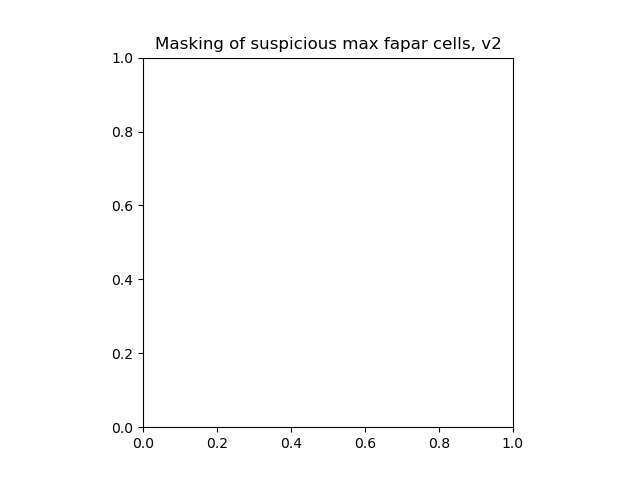

Text(0.5, 1.0, 'Masking of suspicious max fapar cells, v2')

In [28]:
#No strange max values in _v2 don't always correspond to highly masked regions.
dfv2['faparMask_mean'] = dfv2['faparMask_mean'].astype('float64')
dfv2[dfv2['faparVal_max']==0].plot(column = 'faparMask_mean', legend = True)
plt.title('Masking of suspicious max fapar cells, v2')

In [30]:
dfv2['faparVal_myMean'].replace('--', np.nan, inplace = True)

<IPython.core.display.Javascript object>


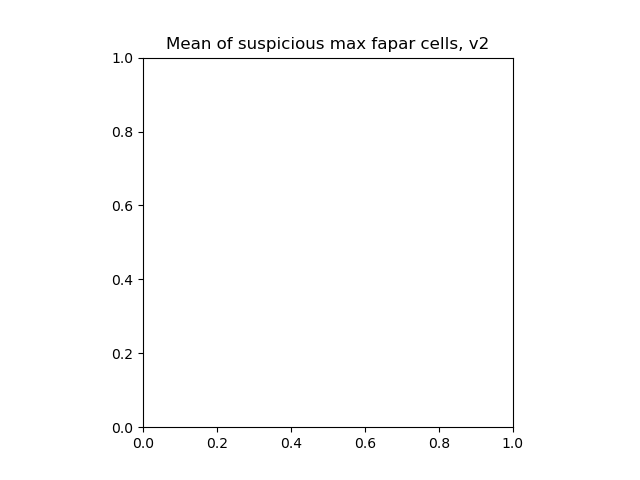

Text(0.5, 1.0, 'Mean of suspicious max fapar cells, v2')

In [31]:
#No suspicious maxes in v2
dfv2['faparVal_myMean'] = dfv2['faparVal_myMean'].astype('float64')
dfv2[dfv2['faparVal_max']==0].plot(column = 'faparVal_myMean', legend = True)
plt.title('Mean of suspicious max fapar cells, v2')

#### Now look at this again for _v1

In [32]:
dfv1 = ca_s2_df.merge(fapar2016, on = 'mergeKey')
len(dfv1)

383148

<IPython.core.display.Javascript object>


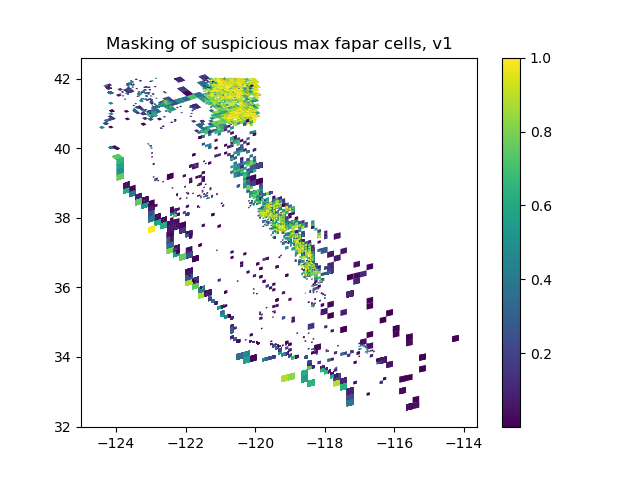

Text(0.5, 1.0, 'Masking of suspicious max fapar cells, v1')

In [33]:
#The strange max values in _v2 don't always correspond to highly masked regions.
dfv1['faparMask_myMean'] = dfv1['faparMask_myMean'].astype('float64')
dfv1[dfv1['faparVal_max']==0].plot(column = 'faparMask_myMean', legend = True)
plt.title('Masking of suspicious max fapar cells, v1')

<IPython.core.display.Javascript object>


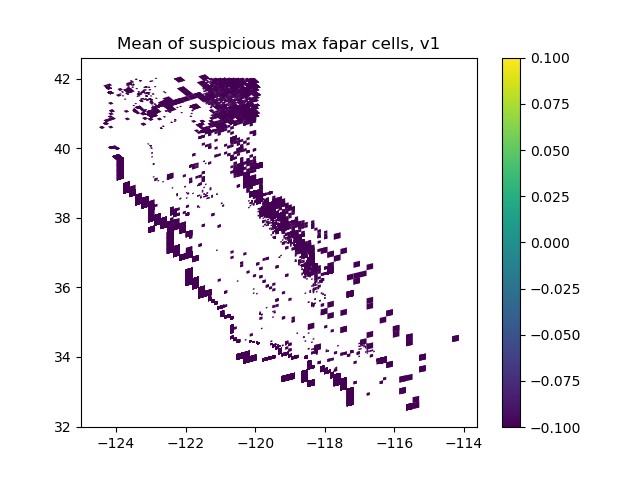

Text(0.5, 1.0, 'Mean of suspicious max fapar cells, v1')

In [65]:

# These are all 0.  This marks the distinction between v1 and v2

dfv1['faparVal_myMean'].replace('--', np.nan, inplace = True)
dfv1['faparVal_myMean'] = dfv1['faparVal_myMean'].astype('float64')
dfv1[dfv1['faparVal_max']==0].plot(column = 'faparVal_myMean', legend = True)
plt.title('Mean of suspicious max fapar cells, v1')

In [35]:
fapar2017_v2 = pd.read_csv('/home/scott/sat_aggs/dated/fapar2017_v2.csv')
fapar2017_v2.head()

,Unnamed: 0,mergeKey,lat_min,lat_max,lat_mean,lat_median,lat_std,lat_size,lat_count,lat_nunique,...,faparMask_nunique,faparVal_size,faparVal_count,faparVal_nunique,faparVal_myMean,faparVal_myMedian,faparVal_myStd,faparVal_min,faparVal_max,date
0,0,54c934,41.958333,42.053571,42.018738,42.020833,0.022960,2023,2023,33,...,2,2023,2023,793,0.2742482876224475,0.28,0.11738375729778956,0.0,0.684,2017-01-10
1,1,54c9354,41.958333,41.997024,41.978733,41.979167,0.009036,206,206,14,...,2,206,206,71,0.23092179881489794,0.23600002,0.10720457605198411,0.016,0.504,2017-01-10
2,2,54c935c,41.973214,42.011905,41.993210,41.994048,0.009065,206,206,14,...,2,206,206,98,0.3303065416912963,0.34800002,0.11520819870815706,0.048,0.652,2017-01-10
3,3,54c9364,41.988095,42.026786,42.007709,42.008929,0.009110,205,205,14,...,2,205,205,96,0.2892258135421622,0.282,0.11256101650054215,0.080000006,0.56,2017-01-10
4,4,54c9414,41.988095,42.029762,42.008885,42.008929,0.009139,206,206,15,...,2,206,206,1,0.2240000143647194,0.224,0.0040000006556510925,0.22000001,0.22800002,2017-01-10


In [36]:
fapar2018_v2 = pd.read_csv('/home/scott/sat_aggs/dated/fapar2018_v2.csv')
fapar2018_v2.head()

,Unnamed: 0,mergeKey,lat_min,lat_max,lat_mean,lat_median,lat_std,lat_size,lat_count,lat_nunique,...,faparMask_nunique,faparVal_size,faparVal_count,faparVal_nunique,faparVal_myMean,faparVal_myMedian,faparVal_myStd,faparVal_min,faparVal_max,date
0,0,54c934,41.958333,42.053571,42.018738,42.020833,0.022960,2023,2023,33,...,2,2023,2023,228,0.2330341574345236,0.224,0.08813017211532183,0.040000003,0.63600004,2018-01-10
1,1,54c9354,41.958333,41.997024,41.978733,41.979167,0.009036,206,206,14,...,2,206,206,84,0.19515273299783908,0.16800001,0.08741133181072419,0.040000003,0.476,2018-01-10
2,2,54c935c,41.973214,42.011905,41.993210,41.994048,0.009065,206,206,14,...,1,206,206,81,0.26712617596376287,0.26000002,0.09854758262373257,0.060000002,0.51600003,2018-01-10
3,3,54c9364,41.988095,42.026786,42.007709,42.008929,0.009110,205,205,14,...,1,205,205,75,0.21586352092463795,0.20400001,0.07843083909889231,0.068,0.432,2018-01-10
4,4,54c9414,41.988095,42.029762,42.008885,42.008929,0.009139,206,206,15,...,1,206,206,42,0.1840777350860892,0.18400002,0.038791375409963406,0.096,0.272,2018-01-10


In [37]:
fapar2016_v2.columns

Index(['Unnamed: 0', 'mergeKey', 'lat_min', 'lat_max', 'lat_mean',
       'lat_median', 'lat_std', 'lat_size', 'lat_count', 'lat_nunique',
       'lon_min', 'lon_max', 'lon_mean', 'lon_median', 'lon_std', 'lon_size',
       'lon_count', 'lon_nunique', 'faparMask_min', 'faparMask_max',
       'faparMask_mean', 'faparMask_median', 'faparMask_std', 'faparMask_size',
       'faparMask_count', 'faparMask_nunique', 'faparVal_size',
       'faparVal_count', 'faparVal_nunique', 'faparVal_myMean',
       'faparVal_myMedian', 'faparVal_myStd', 'faparVal_min', 'faparVal_max',
       'date'],
      dtype='object')

In [38]:
fapar2016_v2.drop(['Unnamed: 0'], axis = 1, inplace=True)
fapar2017_v2.drop(['Unnamed: 0'], axis = 1, inplace=True)
fapar2018_v2.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [39]:
fapar2017_v2.columns

Index(['mergeKey', 'lat_min', 'lat_max', 'lat_mean', 'lat_median', 'lat_std',
       'lat_size', 'lat_count', 'lat_nunique', 'lon_min', 'lon_max',
       'lon_mean', 'lon_median', 'lon_std', 'lon_size', 'lon_count',
       'lon_nunique', 'faparMask_min', 'faparMask_max', 'faparMask_mean',
       'faparMask_median', 'faparMask_std', 'faparMask_size',
       'faparMask_count', 'faparMask_nunique', 'faparVal_size',
       'faparVal_count', 'faparVal_nunique', 'faparVal_myMean',
       'faparVal_myMedian', 'faparVal_myStd', 'faparVal_min', 'faparVal_max',
       'date'],
      dtype='object')

In [40]:
fapar_v2 = fapar2016_v2.append(fapar2017_v2).append(fapar2018_v2)
fapar_v2.head()

,mergeKey,lat_min,lat_max,lat_mean,lat_median,lat_std,lat_size,lat_count,lat_nunique,lon_min,...,faparMask_nunique,faparVal_size,faparVal_count,faparVal_nunique,faparVal_myMean,faparVal_myMedian,faparVal_myStd,faparVal_min,faparVal_max,date
0,54c934,41.958333,42.053571,42.018738,42.020833,0.022960,2023,2023,33,-121.610119,...,2,2023,2023,540,0.2472028084368486,0.23600002,0.07386056904311214,0.040000003,0.61600006,2016-01-10
1,54c9354,41.958333,41.997024,41.978733,41.979167,0.009036,206,206,14,-121.526786,...,2,206,206,115,0.22059524815440887,0.20400001,0.07666953653002337,0.040000003,0.61600006,2016-01-10
2,54c935c,41.973214,42.011905,41.993210,41.994048,0.009065,206,206,14,-121.479167,...,2,206,206,106,0.24735898500642714,0.23400001,0.06987974842246329,0.120000005,0.42000002,2016-01-10
3,54c9364,41.988095,42.026786,42.007709,42.008929,0.009110,205,205,14,-121.431548,...,2,205,205,85,0.2623437612783164,0.24000001,0.08853887547404075,0.104,0.51600003,2016-01-10
4,54c9414,41.988095,42.029762,42.008885,42.008929,0.009139,206,206,15,-121.172619,...,2,206,206,24,0.264216227305902,0.26000002,0.02891846516952588,0.19600001,0.33200002,2016-01-10


In [41]:
len(fapar_v2)

1149444

In [42]:
len(fapar_v2) / 10643  #10643 is count of s2 cells, this should be 36 * 3

108.0

In [43]:
fapar_v2.size

39081096

In [46]:
# push to bigquery

fapar_v2.to_gbq('wildfire_sat.Wildfire_sat_v2',
                        'wildfire-sat',
                       if_exists='replace',
                       reauth=True)


Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=725825577420-unm2gnkiprugilg743tkbig250f4sfsj.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fbigquery&state=GXiDCTEMcFNhSSrR9kSNUfK587pBrv&prompt=consent&access_type=offline&code_challenge=XPVukuxzWiA3riKn1lc9i-k_YailcT_JlScg0BChn9A&code_challenge_method=S256
Enter the authorization code: 4/lgHPq88sr9EUPpk8EzFXScgN7WI-pT8CovwCtjp26X535BRKRnZTn6g
